Run 2.txt


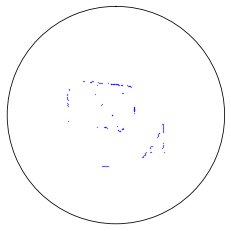

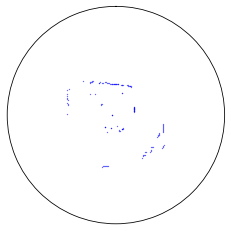

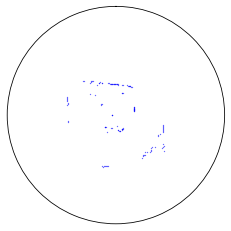

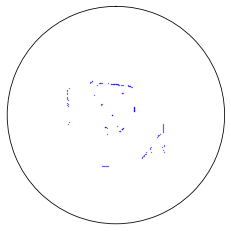

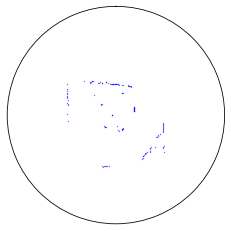

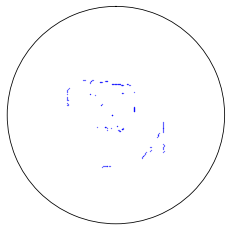

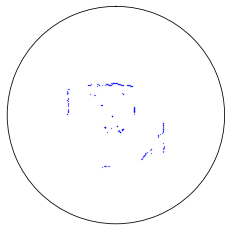

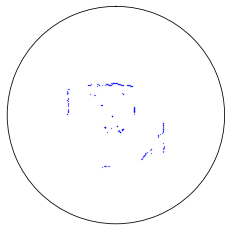

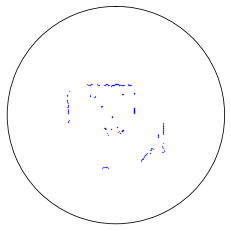

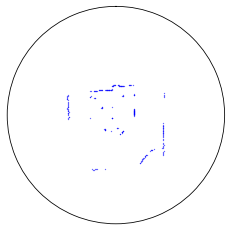

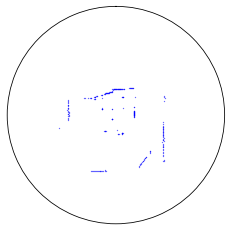

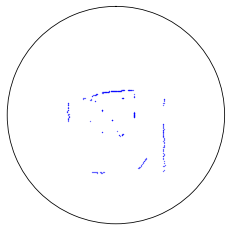

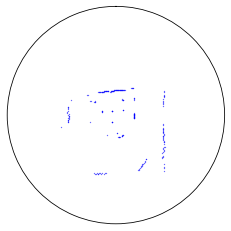

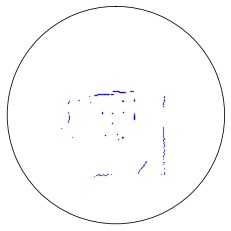

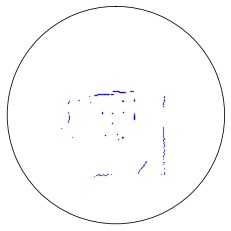

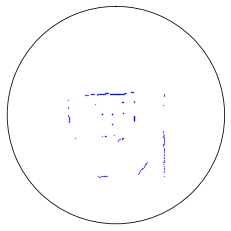

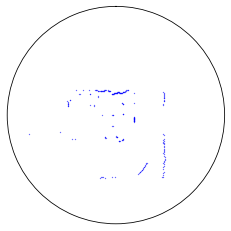

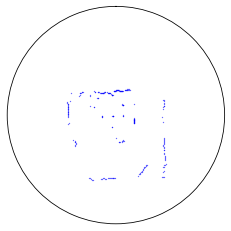

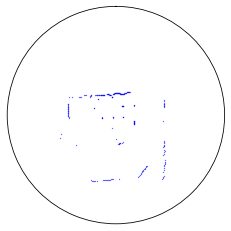

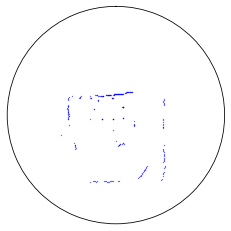

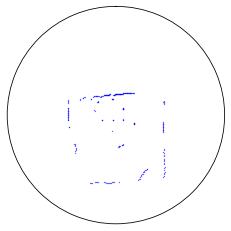

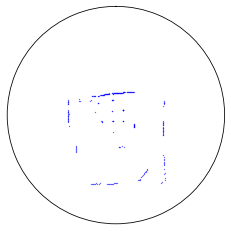

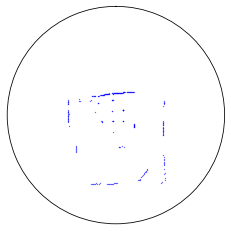

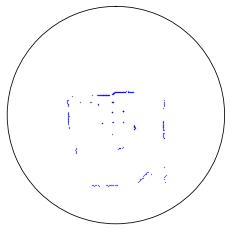

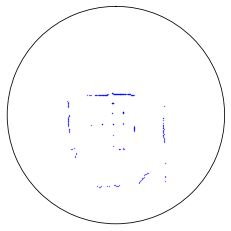

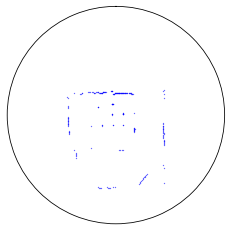

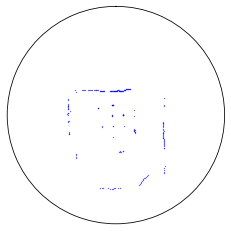

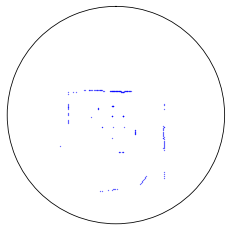

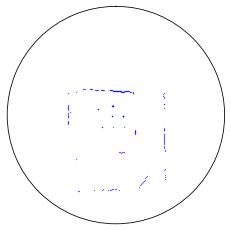

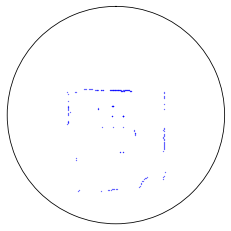

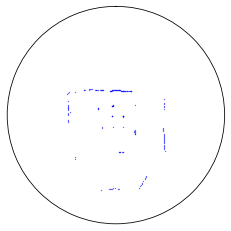

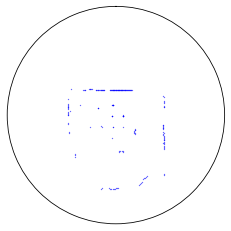

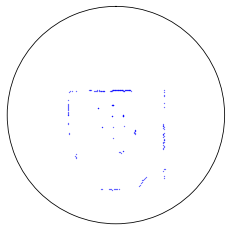

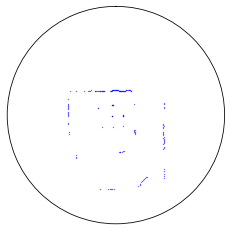

In [58]:
# Visualize Data
import math
import matplotlib.pyplot as plt
import numpy as np
import json
import time

count = 0

def plot(data, save):
    global count

    # Plot data that is in the format specified 
    ax = plt.subplot(projection='polar')
    ax.grid(False)
    dataX = []
    dataY = []
    for i in (data):
        dataX.append(i[0])
        dataY.append(i[1])
    
    ax.plot(dataX, dataY, "b.", markersize = 0.5)
    ax.set_theta_direction(-1)
    ax.set_rmax(6000)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_theta_offset(np.pi / 2.0)
    if save:
        plt.savefig(f"{count}.png")
    plt.show()
    plt.pause(0.01)



def visualize(filename, save):
    global count

    # Load Data from txt files
    dataX = []
    dataY = []
    print(filename)
    with open(filename, 'r') as f:
        input = json.loads(f.read())
        for j in input:
            time.sleep(0.1)
            count += 1
            plot(j, save)

visualize("Run 2.txt", True)


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import json
import time

39


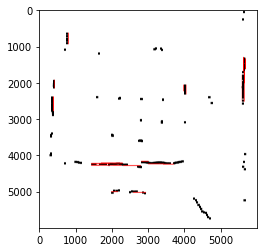

In [13]:
def detectDots(dataHistoryX, dataHistoryY):
    cartX = []
    cartY = []
    for i in range(len(dataHistoryX)):
        cartX.append(dataHistoryY[i] * math.cos(dataHistoryX[i]) + 3000)
        cartY.append(dataHistoryY[i] * math.sin(dataHistoryX[i]) + 3000)
    original = np.zeros((6000, 6000), dtype=np.uint8)
    original.fill(255)
    for x, y in zip(cartX, cartY):
        # print(x)
        original[int(x)-30:int(x)+30, int(y)-30:int(y)+30] = 0

    # plt.imshow(original, cmap="gray")

    annotatedColor = cv.cvtColor(original, cv.COLOR_GRAY2RGB)

    blurred = cv.blur(original, ksize=(17, 17))
    edges = cv.Canny(blurred, 80, 120, apertureSize=3)
    lines = cv.HoughLinesP(edges, rho = 1, theta = math.pi/2, threshold = 50, minLineLength=150, maxLineGap=300)
    c = (255, 0, 0)
    for i in lines:
            line = i[0]
            cv.line(annotatedColor, (line[0],line[1]),(line[2],line[3]), color=c, thickness=20)
    print(len(lines))
    return annotatedColor
    

# fig, plots = plt.subplots(10, figsize=(100, 100))

# for i in range(10):
dataHistoryX, dataHistoryY = zip(*eval(open("Run 2.txt").read())[25])
result = detectDots(dataHistoryX, dataHistoryY)
plt.imshow(result)
# plots[i].imshow(result)



()


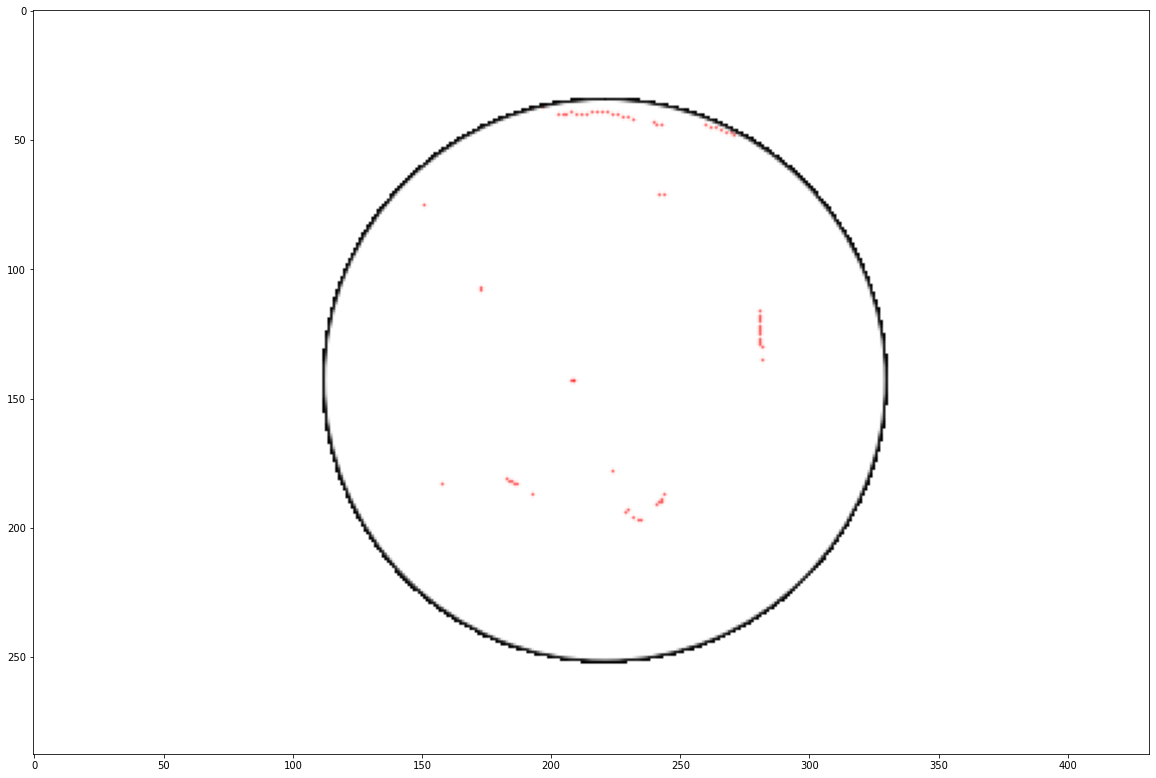

In [35]:
import cv2

# Load the image
image = cv2.imread("1.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the minimum size of the blobs to detect
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 100
params.maxThreshold = 255

# Detect blobs in the image
detector = cv2.SimpleBlobDetector_create(params)
blobs = detector.detect(gray)

print(blobs)

# Loop over the detected blobs and draw a circle around them
for blob in blobs:
    print(blob)
    x, y, w, h = blob
    cv2.circle(image, (x, y), w, (0, 255, 0), 2)

# Show the image with the blobs circled
fig = plt.figure(figsize=(20, 20))
plt.imshow(image)



0


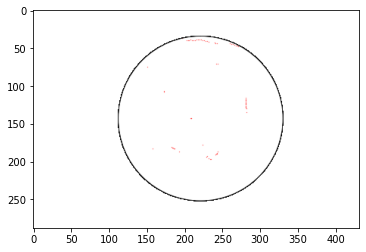

In [41]:
import cv2

# Create a SimpleBlobDetector_Params object and set its thresholds
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 100
params.maxThreshold = 255

# Create a SimpleBlobDetector using the given parameters
detector = cv2.SimpleBlobDetector_create(params)

# Load the image and convert it to grayscale
img = cv2.imread("1.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect blobs in the image
keypoints = detector.detect(gray_img)

# Filter the detected blobs by width
filtered_keypoints = [kp for kp in keypoints if kp.size > 3]

print(len(filtered_keypoints))

# Draw the detected blobs on the original image
img_with_blobs = cv2.drawKeypoints(img, filtered_keypoints, None, color=(0, 255, 0))

# Show the original image and the image with the detected blobs
plt.imshow(img_with_blobs)


2
1


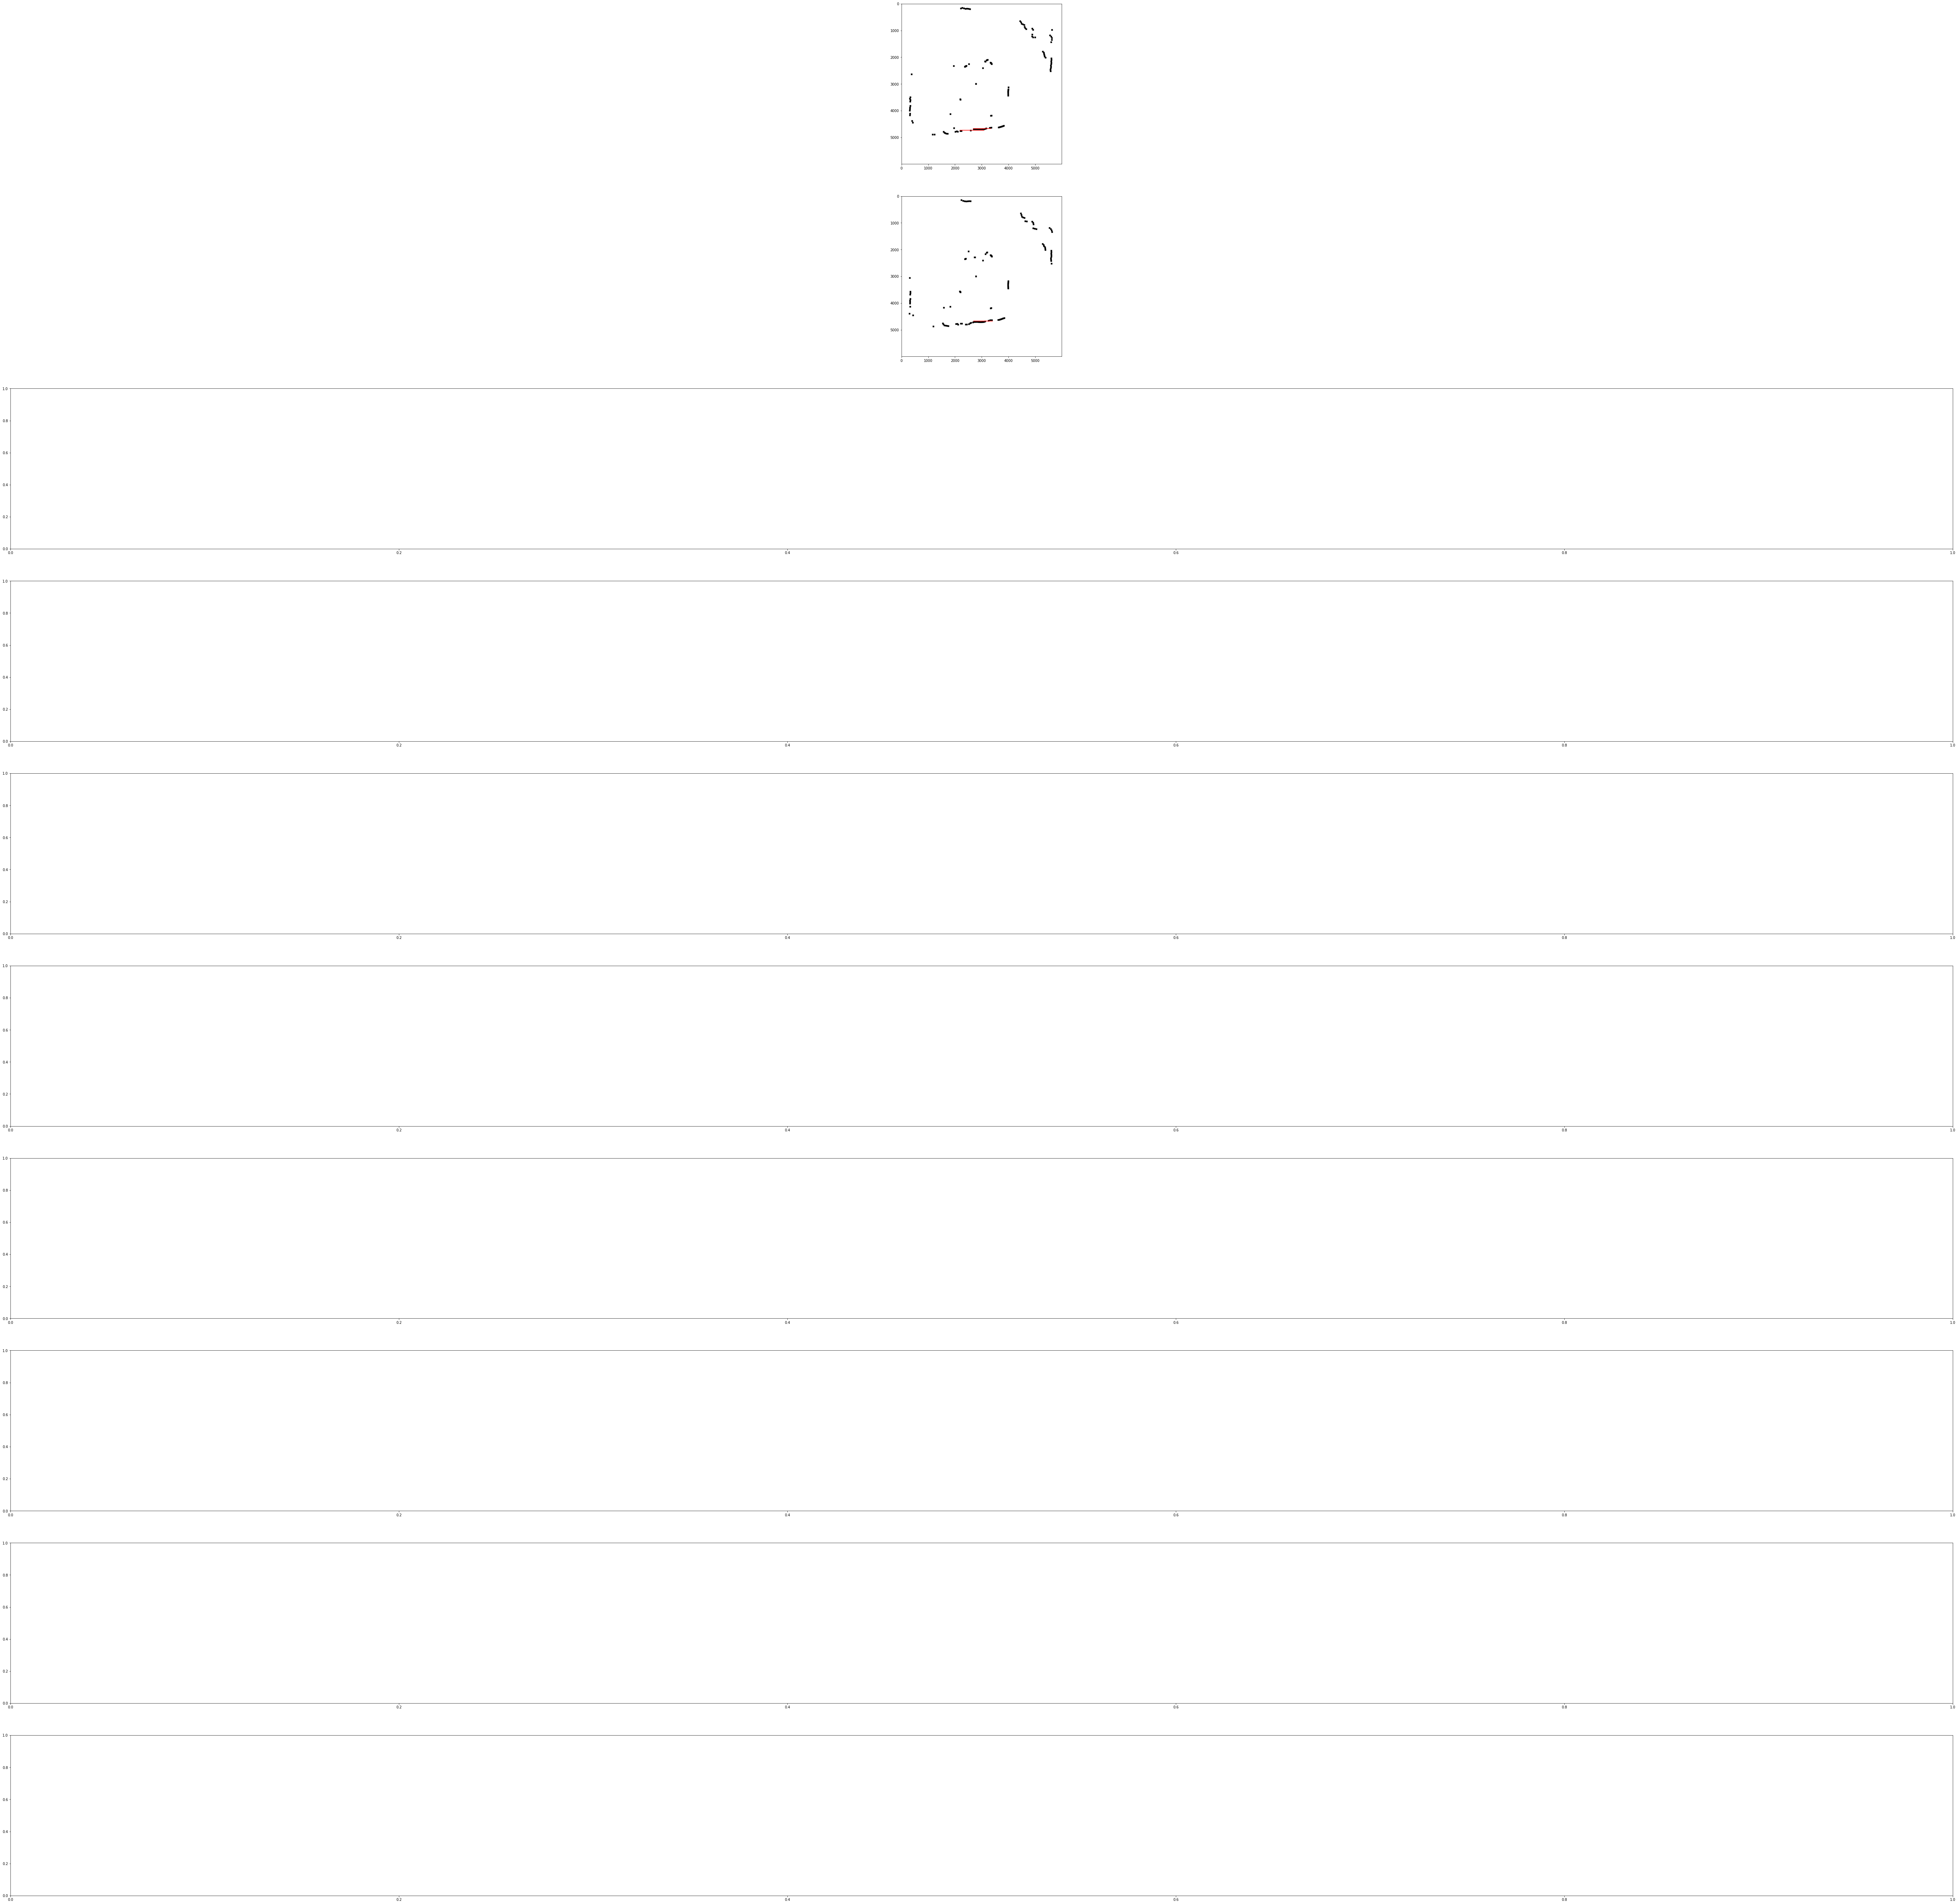

In [4]:
def detectWalls(dataHistoryX, dataHistoryY):
    cartX = []
    cartY = []
    for i in range(len(dataHistoryX)):
        cartX.append(dataHistoryY[i] * math.cos(dataHistoryX[i]) + 3000)
        cartY.append(dataHistoryY[i] * math.sin(dataHistoryX[i]) + 3000)
    original = np.zeros((6000, 6000), dtype=np.uint8)
    original.fill(255)
    for x, y in zip(cartX, cartY):
        # print(x)
        original[int(x)-30:int(x)+30, int(y)-30:int(y)+30] = 0

    # plt.imshow(original, cmap="gray")

    annotatedColor = cv.cvtColor(original, cv.COLOR_GRAY2RGB)

    blurred = cv.blur(original, ksize=(17, 17))
    edges = cv.Canny(blurred, 80, 120, apertureSize=3)
    lines = cv.HoughLinesP(edges, rho = 1, theta = math.pi/2, threshold = 100, minLineLength=600, maxLineGap=600)
    c = (255, 0, 0)
    for i in lines:
            line = i[0]
            cv.line(annotatedColor, (line[0],line[1]),(line[2],line[3]), color=c, thickness=20)
    print(len(lines))
    return annotatedColor

fig, plots = plt.subplots(10, figsize=(100, 100))

for i in range(10):
    dataHistoryX, dataHistoryY = zip(*eval(open("Run 2.txt").read())[i])
    result = detectWalls(dataHistoryX, dataHistoryY)

    plots[i].imshow(result)



5


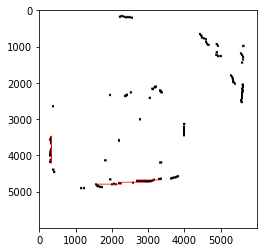

In [ ]:
plt.imshow(abc, cmap="gray")

In [ ]:
import json


input = "[[[1], [2], [3]], [[4], [5], [6]]]"
r = json.loads(input)
print(r)

In [1]:
import cv2 as cv
from PIL import Image as im

# Open image with opencv
I1 = cv.cvtColor(cv.imread("0.png"), cv.COLOR_RGB2GRAY)
I2 = cv.cvtColor(cv.imread("1.png"), cv.COLOR_RGB2GRAY)

points1 = cv.cornerHarris(I1, 1, 1, 0.4)
points2 = cv.cornerHarris(I2, 1, 1, 0.4)

print(points1.shape)
for i in range(288):
    for j in range(432):
        if points1[i][j] != 0:
            points1[i][j] = 255


data = im.fromarray(points1)

data.show()

# cv.imwrite("r.png", points1)
# cv.waitKey(0)

# print(points1)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2 as cv
image = cv.imread("32.png", 0)


In [ ]:
image